In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Imports and displays dataset

d=pd.read_csv("C:\\Users\\LilyB\Desktop\\recycling-diversion-and-capture-rates.csv")
df=pd.DataFrame(d)

display(df.head())
print(df.shape)

'''
*Diversion rate (percentage of total municipal solid waste collected by the Department of Sanitation 
    that is disposed of by recycling)

*Capture Rate (percentage of total Paper or Metal/Glass/Plastic in the waste stream that is disposed of by recycling)

*Capture rate is the amount of materials set out for residential recycling collection as a percentage of designated recyclable 
    materials in both recycling and refuse streams. 
*This ratio measures how much of the targeted materials are actually being recycled, which is a measure of 
    how successfully such materials are recycled.
'''

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.687093,44.909160,43.034062,44.146764
1,Brooklyn North,BKN02,10,2019,April,19.950181,34.194020,57.947031,41.213700
2,Brooklyn North,BKN03,10,2019,April,12.164161,33.521557,44.919731,38.155937
3,Brooklyn North,BKN04,10,2019,April,15.541803,35.211361,68.511260,48.750755
4,Brooklyn North,BKN05,10,2019,April,10.051845,22.265430,45.051791,31.530129


(2832, 9)


'\n*Diversion rate (percentage of total municipal solid waste collected by the Department of Sanitation \n    that is disposed of by recycling)\n\n*Capture Rate (percentage of total Paper or Metal/Glass/Plastic in the waste stream that is disposed of by recycling)\n\n*Capture rate is the amount of materials set out for residential recycling collection as a percentage of designated recyclable \n    materials in both recycling and refuse streams. \n*This ratio measures how much of the targeted materials are actually being recycled, which is a measure of \n    how successfully such materials are recycled.\n'

In [2]:
#Takes the total mean and median of recycables collected from waste 
diversion_rate = df["Diversion Rate-Total (Total Recycling / Total Waste)"]

print('Mean:',diversion_rate.mean())
print('Median:',diversion_rate.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(diversion_rate)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(diversion_rate,0.25))
q3=(np.quantile(diversion_rate,0.75))

#Calculates the outliers among the diversion rate array 
data = np.array(diversion_rate)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 17.48402440051608
Median: 16.88714999813185
Outliers of array: [32.76639293 33.14993154 33.75441541]


In [3]:
#Takes the total mean and median of the capture rate of paper
capture_rate_paper = df['Capture Rate-Paper (Total Paper / Max Paper)']

print('Mean:',capture_rate_paper.mean())
print('Median:',capture_rate_paper.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(capture_rate_paper)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(capture_rate_paper,0.25))
q3=(np.quantile(capture_rate_paper,0.75))

#Calculates the outliers among the capture rate of paper array 
data = np.array(capture_rate_paper)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 38.43022417704809
Median: 37.757412044136146
Outliers of array: [65.21357669 67.36688266 72.59384028]


In [4]:
#Takes the total mean and median of the capture rate of metal, glass, plastic (MGP)
capture_rate_MGP = df['Capture Rate-MGP (Total MGP / Max MGP)']

print('Mean:',capture_rate_MGP.mean())
print('Median:',capture_rate_MGP.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(capture_rate_MGP)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(capture_rate_MGP,0.25))
q3=(np.quantile(capture_rate_MGP,0.75))

#Calculates the outliers among the capture rate of MGP array 
data = np.array(capture_rate_MGP)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 61.22426331456263
Median: 61.610488039174896
Outliers of array: []


In [5]:
#Takes the total mean and median of the capture rate total
capture_rate_total = df['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']

print('Mean:',capture_rate_total.mean())
print('Median:',capture_rate_total.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(capture_rate_total)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(capture_rate_total,0.25))
q3=(np.quantile(capture_rate_total,0.75))

#Calculates the outliers among the capture rate of total array 
data = np.array(capture_rate_total)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 46.158227700961206
Median: 46.31051677665225
Outliers of array: [18.49133542 19.02315178 19.4481428  20.00599308 20.22763354 72.66520846
 72.71729699 73.21243722 73.27468959 73.97775693 74.1668333  75.26127567
 75.52236469]


In [6]:
#Creates a groupby object for Zone and finds the average rate by zone

'''
There are limitations to this dataset as the individual varibales are not provided, therefore the final averages of
each zone's capture rate is calculated by taking the average rates provided.
'''

#Caculates the averages of each zone's total capture rate and sorts the values from least to greatest 
column_name = 'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'
df.groupby('Zone').mean().sort_values(by=column_name, ascending=True)

,Fiscal Month Number,Fiscal Year,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
Zone,,,,,,
Brooklyn North,6.5,2017.5,13.658001,34.005755,48.915670,39.659000
Bronx,6.5,2017.5,13.614674,31.547229,53.441428,40.198558
Manhattan,6.5,2017.5,20.489944,40.948286,62.112114,46.331025
Queens East,6.5,2017.5,18.309736,38.421830,68.270221,48.768839
Brooklyn South,6.5,2017.5,19.300317,44.946005,63.154190,51.058554
Queens West,6.5,2017.5,19.468078,40.636283,72.301633,51.505599
Staten Island,6.5,2017.5,20.410823,44.488140,77.652438,55.533794


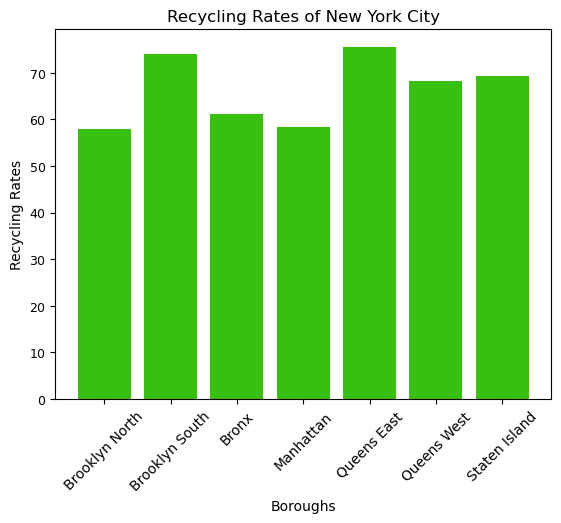

"\nCan't get the sort_values() to work with the recycling rates in order to display the values in ascending order.\nAlso, the y-axis isn't correct with the values, how did I fix this?\n"

In [7]:
x_axis = df['Zone']
y_axis = df[column_name]#.sort_values()

plt.bar(x_axis, y_axis, color='#37C10E')
plt.title('Recycling Rates of New York City')
plt.xlabel('Boroughs')
plt.xticks(rotation = 45)
plt.ylabel('Recycling Rates')
plt.yticks(fontsize = 9)

plt.show()

'''
Can't get the sort_values() to work with the recycling rates in order to display the values in ascending order.
Also, the y-axis isn't correct with the values, how did I fix this?
'''